In [2]:
import pathlib
from typing import Any

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import AutoLocator, MultipleLocator

In [3]:
data_folder_list = [
    "data-multiwoz21_split-train_ctxt-dataset_entry_samples-10000_feat-col-ner_tags/",
    "data-multiwoz21_split-validation_ctxt-dataset_entry_samples-3000_feat-col-ner_tags/",
    "data-multiwoz21_split-test_ctxt-dataset_entry_samples-3000_feat-col-ner_tags/",
    "data-one-year-of-tsla-on-reddit_split-train_ctxt-dataset_entry_samples-10000_feat-col-ner_tags/",
    "data-one-year-of-tsla-on-reddit_split-validation_ctxt-dataset_entry_samples-3000_feat-col-ner_tags/",
]

selected_data_folder = data_folder_list[4]

file_path = pathlib.Path(
    "/Users/ruppik/git-source/Topo_LLM/data/analysis/sample_sizes/run_general_comparisons/analysis/twonn/",
    selected_data_folder,
    "lvl-token/add-prefix-space-True_max-len-512/model-roberta-base_task-masked_lm/layer--1_agg-mean/norm-None/full_local_estimates_df.csv",
)

results_base_directory_path: pathlib.Path = file_path.parent

local_estimates_df: pd.DataFrame = pd.read_csv(
    filepath_or_buffer=file_path,
)

local_estimates_df

,Unnamed: 0,path,array_name,array_data,data_prep_sampling_method,data_prep_sampling_seed,data_prep_sampling_samples,local_estimates_description,local_estimates_samples,zerovec,deduplication,neighbors_mode,n_neighbors,num_elements,array_data_truncated,array_data_mean,array_data_std,array_data_truncated_mean,array_data_truncated_std
0,1,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[14.88628627 13.59394707 16.73142799 ... 13.29...,random,44,20000,twonn,2500,keep,array_deduplicator,absolute,256,2500,[14.88628627 13.59394707 16.73142799 ... 13.29...,14.923879,2.186916,14.923879,2.186916
1,3,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[12.1787491 11.94957318 15.38352159 ... 17.24...,random,57,30000,twonn,2500,keep,array_deduplicator,absolute,256,2500,[12.1787491 11.94957318 15.38352159 ... 17.24...,14.532833,2.578718,14.532833,2.578718
2,5,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[13.36969178 14.42959365 13.42845741 ... 15.88...,random,43,60000,twonn,2500,keep,array_deduplicator,absolute,256,2500,[13.36969178 14.42959365 13.42845741 ... 15.88...,14.447740,2.073957,14.447740,2.073957
3,7,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[12.49433246 5.30356319 15.13644918 ... 7.03...,random,44,30000,twonn,7500,keep,array_deduplicator,absolute,16,7500,[12.49433246 5.30356319 15.13644918 ... 14.42...,11.769433,6.196797,11.732683,6.212493
4,8,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[12.87504512 6.13759504 13.9932247 ... 9.19...,random,44,30000,twonn,7500,keep,array_deduplicator,absolute,128,7500,[12.87504512 6.13759504 13.9932247 ... 13.46...,13.862436,3.787552,13.847584,3.800746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,727,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[11.05671 17.73092118 11.57782578 ... 10.27...,random,42,50000,twonn,45000,keep,array_deduplicator,absolute,128,45000,[11.05671 17.73092118 11.57782578 ... 13.42...,12.853279,4.297267,12.881082,4.297407
447,729,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[13.6049017 14.34837734 20.21969441 ... 15.50...,random,42,50000,twonn,10000,keep,array_deduplicator,absolute,128,10000,[13.6049017 14.34837734 20.21969441 ... 17.29...,13.913938,3.621380,13.889745,3.657213
448,731,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[12.33511167 17.38082357 12.86859395 ... 9.51...,random,42,50000,twonn,35000,keep,array_deduplicator,absolute,128,35000,[12.33511167 17.38082357 12.86859395 ... 15.27...,13.001903,4.151759,12.994212,4.157694
449,733,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[12.113605 14.91789387 13.71918258 ... 18.49...,random,42,50000,twonn,25000,keep,array_deduplicator,absolute,128,25000,[12.113605 14.91789387 13.71918258 ... 17.45...,13.218392,4.014128,13.205359,3.994120


In [4]:
def filter_dataframe(
    df: pd.DataFrame,
    filters_dict: dict[str, Any],
) -> pd.DataFrame:
    """Filter a DataFrame based on key-value pairs specified in a dictionary.

    Args:
        df:
            The DataFrame to be filtered.
        filters_dict:
            A dictionary of column names and corresponding values to filter by.

    Returns:
        A filtered DataFrame with rows matching all key-value pairs.

    """
    subset_df = df.copy()
    for column, value in filters_dict.items():
        subset_df = subset_df[subset_df[column] == value]
    return subset_df


# Function to generate the text for the fixed parameters to be displayed on the plot
def generate_fixed_params_text(filters_dict: dict[str, Any]) -> str:
    """Generate a string representation of the fixed parameters used for filtering.

    Args:
        filters_dict:
            A dictionary of column names and corresponding values used for filtering.

    Returns:
        str:
            A formatted string suitable for display in the plot.

    """
    return "\n".join([f"{key}: {value}" for key, value in filters_dict.items()])


# Select a subset of the data with the same parameters.
# This allows comparing over different seeds.
#
# We do not fix the local_estimates_samples,
# since we want to compare the results for different sample sizes.
filters_dict = {
    "data_prep_sampling_method": "random",
    "deduplication": "array_deduplicator",
    "n_neighbors": 128,
    "data_prep_sampling_samples": 50000,
}

subset_local_estimates_df = filter_dataframe(df=local_estimates_df, filters_dict=filters_dict)

subset_local_estimates_df

,Unnamed: 0,path,array_name,array_data,data_prep_sampling_method,data_prep_sampling_seed,data_prep_sampling_samples,local_estimates_description,local_estimates_samples,zerovec,deduplication,neighbors_mode,n_neighbors,num_elements,array_data_truncated,array_data_mean,array_data_std,array_data_truncated_mean,array_data_truncated_std
46,57,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[15.83186886 7.69758546 11.92336443 ... 7.14...,random,43,50000,twonn,30000,keep,array_deduplicator,absolute,128,30000,[15.83186886 7.69758546 11.92336443 ... 16.25...,13.218616,4.406872,13.281310,4.480928
47,59,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[15.96789407 8.07243529 10.77925109 ... 16.78...,random,43,50000,twonn,20000,keep,array_deduplicator,absolute,128,20000,[15.96789407 8.07243529 10.77925109 ... 13.58...,13.578279,4.420490,13.582979,4.476795
48,61,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[13.08189241 6.88421593 10.59278188 ... 10.36...,random,43,50000,twonn,15000,keep,array_deduplicator,absolute,128,15000,[13.08189241 6.88421593 10.59278188 ... 14.64...,13.955015,4.317568,13.898875,4.344416
49,63,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[14.44992832 8.98569564 11.87242811 ... 9.91...,random,43,50000,twonn,40000,keep,array_deduplicator,absolute,128,40000,[14.44992832 8.98569564 11.87242811 ... 17.57...,13.079854,4.510399,13.132247,4.597527
50,65,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[19.17956056 7.46599159 9.65293064 ... 14.75...,random,43,50000,twonn,50000,keep,array_deduplicator,absolute,128,49296,[19.17956056 7.46599159 9.65293064 ... 17.98...,12.859548,4.568501,12.918771,4.681539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,725,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[19.2100124 12.59458144 15.81631652 ... 12.14...,random,42,50000,twonn,5000,keep,array_deduplicator,absolute,128,5000,[19.2100124 12.59458144 15.81631652 ... 12.14...,14.081467,3.616971,14.081467,3.616971
446,727,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[11.05671 17.73092118 11.57782578 ... 10.27...,random,42,50000,twonn,45000,keep,array_deduplicator,absolute,128,45000,[11.05671 17.73092118 11.57782578 ... 13.42...,12.853279,4.297267,12.881082,4.297407
447,729,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[13.6049017 14.34837734 20.21969441 ... 15.50...,random,42,50000,twonn,10000,keep,array_deduplicator,absolute,128,10000,[13.6049017 14.34837734 20.21969441 ... 17.29...,13.913938,3.621380,13.889745,3.657213
448,731,/Users/ruppik/git-source/Topo_LLM/data/analysi...,local_estimates_pointwise.npy,[12.33511167 17.38082357 12.86859395 ... 9.51...,random,42,50000,twonn,35000,keep,array_deduplicator,absolute,128,35000,[12.33511167 17.38082357 12.86859395 ... 15.27...,13.001903,4.151759,12.994212,4.157694


In [5]:
subset_local_estimates_df.describe()

,Unnamed: 0,data_prep_sampling_seed,data_prep_sampling_samples,local_estimates_samples,n_neighbors,num_elements,array_data_mean,array_data_std,array_data_truncated_mean,array_data_truncated_std
count,200.000000,200.000000,200.0,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000
mean,351.650000,51.500000,50000.0,27500.000000,128.0,27432.185000,13.268248,4.112009,13.271778,4.115072
std,205.137599,5.780751,0.0,14397.445335,0.0,14291.993163,0.475969,0.324772,0.478492,0.332824
min,57.000000,42.000000,50000.0,5000.000000,128.0,5000.000000,12.557652,3.090839,12.565677,3.090839
25%,170.500000,46.750000,50000.0,15000.000000,128.0,15000.000000,12.916593,4.021203,12.915199,3.992495
50%,333.000000,51.500000,50000.0,27500.000000,128.0,27500.000000,13.165960,4.221504,13.180874,4.213067
75%,450.500000,56.250000,50000.0,40000.000000,128.0,40000.000000,13.541943,4.317664,13.558237,4.321614
max,733.000000,61.000000,50000.0,50000.000000,128.0,49365.000000,15.256311,4.653293,15.256311,4.700982


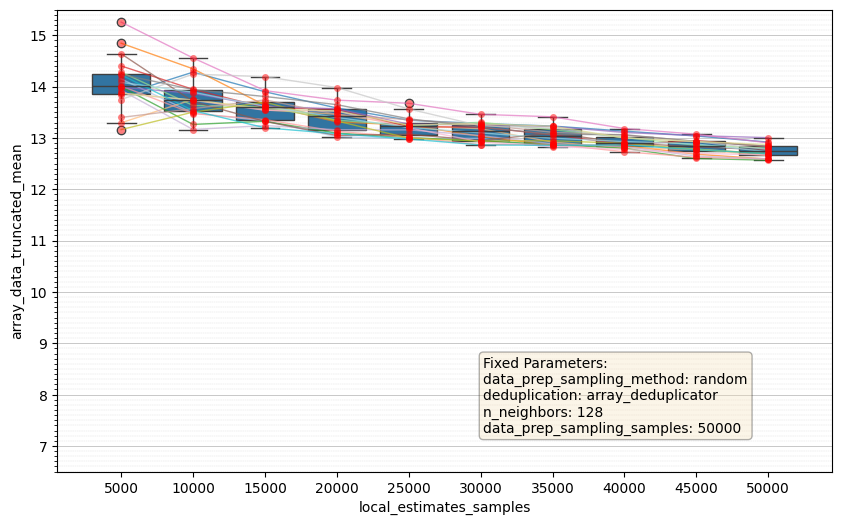

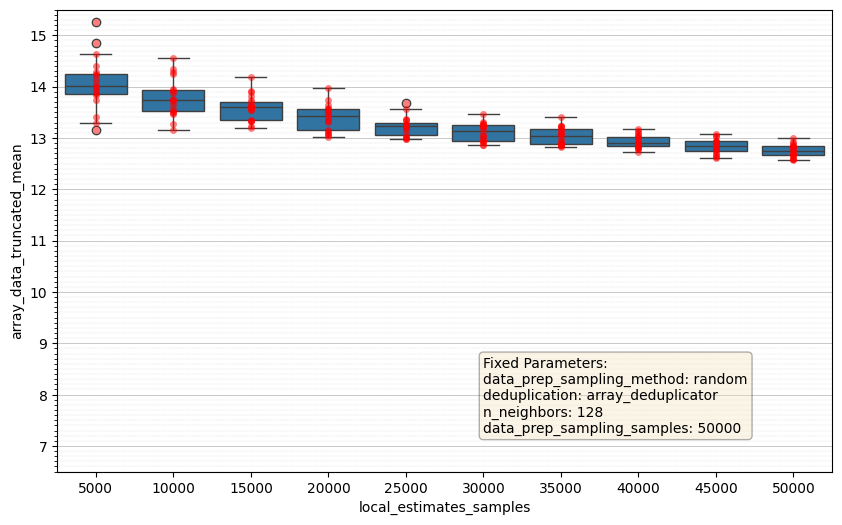

In [7]:
def create_boxplot_of_mean_over_different_sampling_seeds(
    subset_local_estimates_df: pd.DataFrame,
    plot_save_path: pathlib.Path | None = None,
    x_column_name: str = "local_estimates_samples",
    y_column_name: str = "array_data_truncated_mean",
    seed_column_name: str = "data_prep_sampling_seed",
    fixed_params_text: str | None = None,
    *,
    y_min: float = 6.5,
    y_max: float = 15.5,
    show_plot: bool = True,
    connect_points: bool = True,
) -> None:
    """Create a boxplot of the the measurement over different sampling seeds."""
    plt.figure(figsize=(10, 6))

    # Set the fixed y-axis limits
    plt.ylim(y_min, y_max)

    # Automatically set major and minor tick locators
    plt.gca().yaxis.set_major_locator(AutoLocator())  # Auto-adjust major ticks
    plt.gca().yaxis.set_minor_locator(MultipleLocator(0.1))  # Set minor ticks for finer grid

    # Enable the grid with different styling for major and minor lines
    plt.grid(which="major", axis="y", color="gray", linestyle="-", linewidth=0.6, alpha=0.5)  # Major grid lines
    plt.grid(which="minor", axis="y", color="gray", linestyle="--", linewidth=0.3, alpha=0.3)  # Minor grid lines

    # Create boxplot and stripplot
    sns.boxplot(
        x=x_column_name,
        y=y_column_name,
        data=subset_local_estimates_df,
    )
    sns.stripplot(
        x=x_column_name,
        y=y_column_name,
        data=subset_local_estimates_df,
        color="red",
        jitter=False,
        dodge=True,
        marker="o",
        alpha=0.5,
    )

    # Convert the x-axis column to categorical for proper ordering
    subset_local_estimates_df[x_column_name] = pd.Categorical(
        subset_local_estimates_df[x_column_name],
        ordered=True,
    )

    # Connect the points from the same seed across different samples if requested
    if connect_points:
        unique_seeds = subset_local_estimates_df[seed_column_name].unique()
        # Use modern colormap access without resampling argument
        colormap = plt.colormaps.get_cmap("tab20")

        for idx, seed in enumerate(unique_seeds):
            seed_data = subset_local_estimates_df[subset_local_estimates_df[seed_column_name] == seed]
            # Sort seed_data by 'local_estimates_samples' for consistent plotting
            seed_data = seed_data.sort_values(by=x_column_name)

            # Plot lines connecting the same seed points
            plt.plot(
                seed_data[x_column_name].cat.codes,  # Using categorical codes for proper x ordering
                seed_data[y_column_name],
                linestyle="-",
                linewidth=1,
                alpha=0.7,
                color=colormap(idx / len(unique_seeds)),  # Use a different color for each seed
                label=f"Seed {seed}" if idx < 2 else "",  # Labeling only the first few for readability
            )

    # Adding additional information about the fixed parameters in the plot
    if fixed_params_text is not None:
        plt.text(
            x=0.55,
            y=0.25,
            s=f"Fixed Parameters:\n{fixed_params_text}",
            transform=plt.gca().transAxes,
            fontsize=10,
            verticalalignment="top",
            bbox={
                "boxstyle": "round",
                "facecolor": "wheat",
                "alpha": 0.3,
            },
        )

    # Save plot to the specified path if provided
    if plot_save_path is not None:
        plot_save_path.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(plot_save_path, bbox_inches="tight")

    # Show plot if needed
    if show_plot:
        plt.show()


fixed_params_text: str = generate_fixed_params_text(filters_dict)

for connect_points in [True, False]:
    plot_save_path = pathlib.Path(
        results_base_directory_path,
        "different_sampling_seeds",
        "array_data_truncated_mean_boxplot_"
        f"{filters_dict['n_neighbors']=}_{filters_dict['data_prep_sampling_samples']=}_{connect_points=}.pdf",
    )

    create_boxplot_of_mean_over_different_sampling_seeds(
        subset_local_estimates_df=subset_local_estimates_df,
        plot_save_path=plot_save_path,
        fixed_params_text=fixed_params_text,
        y_min=6.5,
        y_max=15.5,
        show_plot=False,
        connect_points=connect_points,
    )